# Results Interpretation of Linear Regression

Y = C + M*X

   * Y = Dependent variable (output/outcome/prediction/estimation)
   * C = Constant (Y-Intercept)
   * M = Slope of the regression line (the effect that X has on Y)
   * X = Independent variable (input variable used in the prediction of Y)

In [2]:
from pandas import DataFrame
import statsmodels.api as sm

In [3]:
#data
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

# here we have 2 variables for the multiple linear regression. 
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.04e-11
Time:                        14:35:37   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

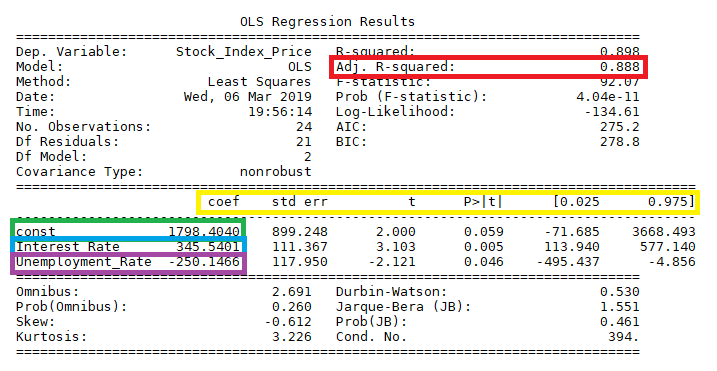

## Interpreting the Regression Results

I highlighted several important components within the results:

   * Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
   * const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
   * Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
   * Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
   * std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
   * P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
   * Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

So for our example, it would look like this:

Stock_Index_Price = (const coef) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2

And this is how the equation would look like once we plug the coefficients:

Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2